# Exploratory Data Analysis: Red Wine Quality

In this notebook, we will perform exploratory data analysis on [red wine quality dataset](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009), then in the next notebook, we will do predictive modeling and model evaluation. Let's start by import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
sns.set_style('darkgrid')

Import the dataset.

In [2]:
dataset = pd.read_csv('winequality-red.csv')

---

## Preliminary

Let's take a look on first five data points in red wine quality dataset.

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Here we can see that this dataset has 12 features, with 'quality' feature will be the target vector on predictive modeling later.

How much data points we have?

In [4]:
dataset.shape

(1599, 12)

We have 1599 data points, which is pretty small relative to common size for machine learning. Now, what kind of data type each feature is?

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Here, we have 11 features with data type as floating point number and quality feature (our target vector) as integer. Note that the quality feature was encoded as integer, so let's change the data type as category to make predictive modeling more robust.

In [6]:
dataset['quality'] = dataset['quality'].astype('category')

---

## Looking for Anomalies

In this subsection, we will look for any anomalies in our dataset. These anomalies can be missing values, duplicates, outliers, unspecified values or any garbage that can ruin our predictive modeling later.

Are there any missing values?

In [7]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

For each feature, there is no missing values (written as null or nan). But maybe they write the missing value as another sentinel value other than null or nan. Let's take a look how many zeros are there?

In [8]:
dataset[dataset == 0].any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

No zero as sentinel value to replace null or nan. 

Are there any duplicated data points?

In [9]:
dataset.duplicated().sum()

240

There are 240 duplicated values in the dataset, which is quite a lot. But, we will leave it as it is right now.

Now, let's find are there any outliers in our dataset. We treat outliers as data points with value less the lower bound and greater than the upper bound. With formula for lower bound is first quantile - 1.5 * interquantile range and formula for upper bound is third quantile + 1.5 * interquatile range.

In [10]:
quantile = dataset.quantile([0.25, 0.75])

In [11]:
quantile

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0.25,7.1,0.39,0.09,1.9,0.07,7.0,22.0,0.995600,3.21,0.55,9.5
0.75,9.2,0.64,0.42,2.6,0.09,21.0,62.0,0.997835,3.40,0.73,11.1


In [12]:
iqr = quantile.iloc[1] - quantile.iloc[0]

In [13]:
iqr

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
dtype: float64

Here, we get the lower bound!

In [14]:
lower_bound = quantile.iloc[0] - 1.5 * iqr

In [15]:
lower_bound

fixed acidity            3.950000
volatile acidity         0.015000
citric acid             -0.405000
residual sugar           0.850000
chlorides                0.040000
free sulfur dioxide    -14.000000
total sulfur dioxide   -38.000000
density                  0.992248
pH                       2.925000
sulphates                0.280000
alcohol                  7.100000
dtype: float64

Here, we get the upper bound!

In [16]:
upper_bound = quantile.iloc[1] + 1.5 * iqr

In [17]:
upper_bound

fixed acidity            12.350000
volatile acidity          1.015000
citric acid               0.915000
residual sugar            3.650000
chlorides                 0.120000
free sulfur dioxide      42.000000
total sulfur dioxide    122.000000
density                   1.001187
pH                        3.685000
sulphates                 1.000000
alcohol                  13.500000
dtype: float64

Now, are there outliers with value beyond our defined lower bound and upper bound?

In [18]:
((dataset.iloc[:, :-1] < lower_bound) & (dataset.iloc[:, :-1] > upper_bound)).any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool

Okay... our dataset looks pretty clean (no missing values or outliers), eventhough there are probably duplicates. But we leave it as it is right now

---

## Summary Statistics

Now, let's look to summary statistics!

In [19]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


To better understand what summary statistics tell us, let's see the distribution for each feature

---

## Distribution

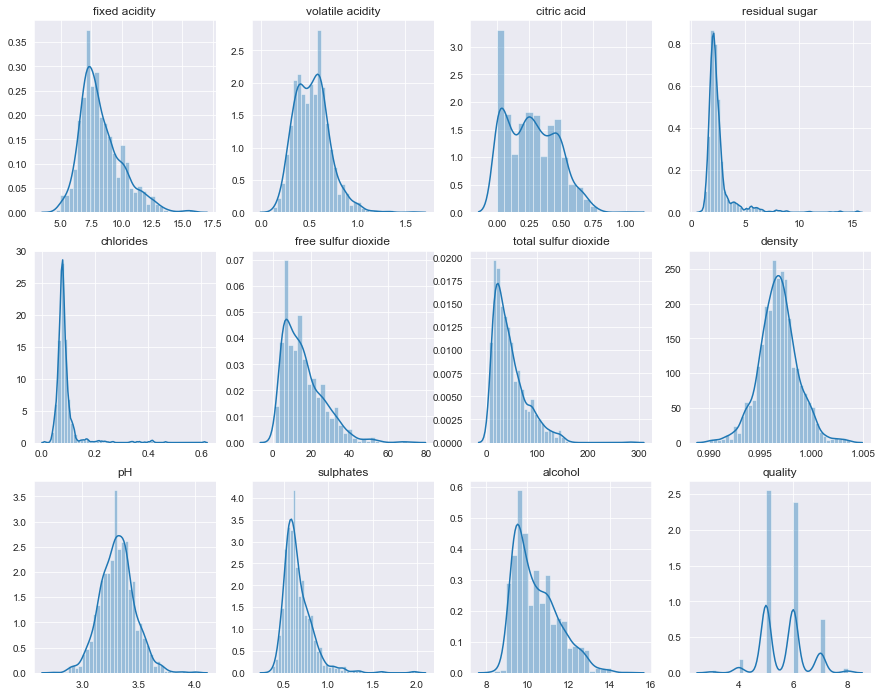

In [20]:
fig, ax = plt.subplots(3, 4, figsize=(15, 12))

for ax, col in zip(ax.ravel(), dataset.columns):
    sns.distplot(dataset[col], ax=ax)
    ax.set_xlabel("")
    ax.set_title(col)

In the distribution we can see that almost all feature are skewed to the right, make long tail in the right region on the graph. It means that the median is on the left of mean or smaller than the mean., except for pH and density which quite centered on the graph.

---

## Grouping based on Quality

In the previous section we have seen the general summary statistics. Now, in this section we will see the summary statistics for specific quality group.

In [21]:
group = dataset.groupby('quality')

In [22]:
group_mean = group.mean()
group_mean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Are there any trend? Let's visualize it!

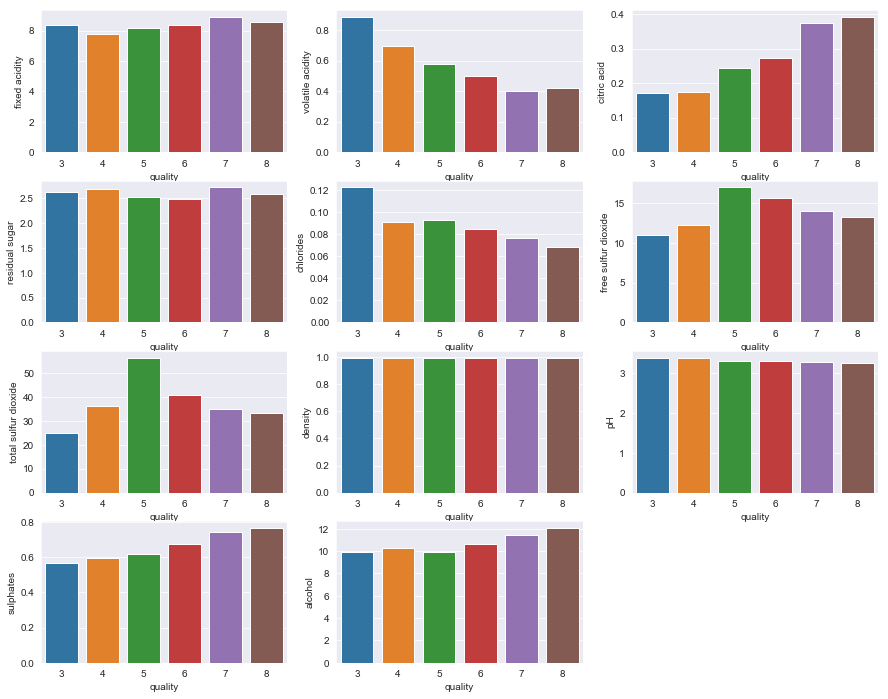

In [42]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

axes = axes.ravel()

for ax, col in zip(axes, group_mean.columns):
    sns.barplot(group_mean.index, group_mean[col], ax=ax)
    
axes[-1].set_visible(False)

For some feature, there are trends that probably useful for us to determine the quality of red wine. But let's zoom for the specified range in y-axis to make it clearer

In [48]:
r = group_mean['pH'].max() - group_mean['pH'].min()
r

0.13077777777777833

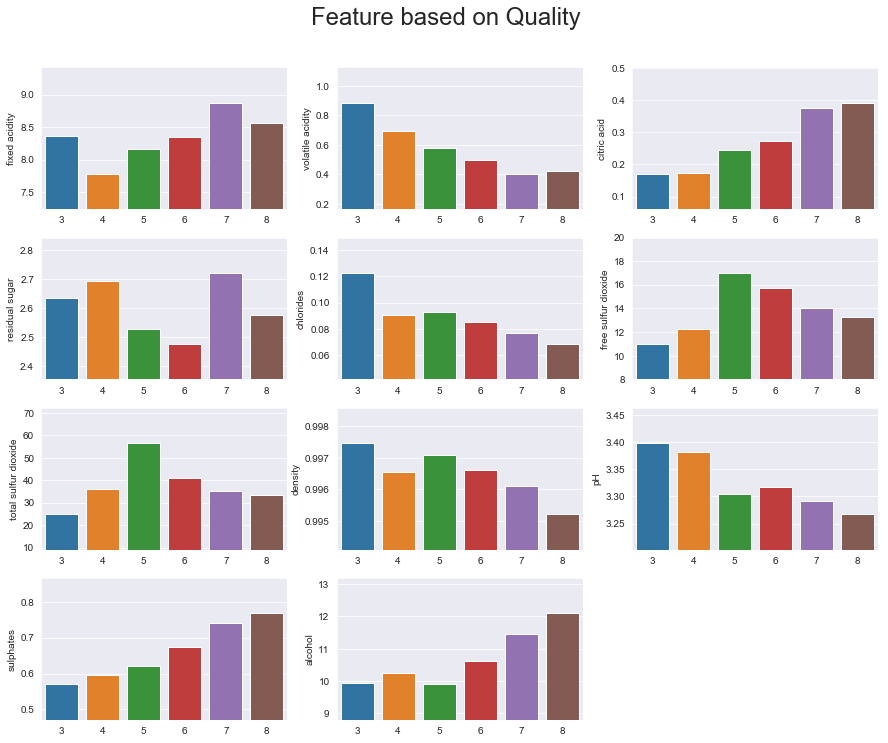

In [63]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

axes = axes.ravel()

for ax, col in zip(axes, group_mean.columns):
    sns.barplot(group_mean.index, group_mean[col], ax=ax)
    r = group_mean[col].max() - group_mean[col].min()
    ax.set_ylim(group_mean[col].min() - 0.5 * r, group_mean[col].max() + 0.5 * r)
    ax.set_xlabel('')
    
axes[-1].set_visible(False)
fig.suptitle('Feature based on Quality', fontsize=24, ha='center', y=0.95);

Here, we can see the trends we've seen in previous graph more clearly. In column sulphates we see that the trend goes up as the quality rises, also for alcohol and citric acid. For columns pH, density, chlorides, and volatile acidity, we see negative trends; as the quality goes up the mean value of feature goes down.

---

## Correlation

In this section, we will look for any correlation between features, and how strong it is. Note that the correlation is only in linear form, non-linear one probably won't be detected.

Correlation of whole dataset.

In [65]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


Visualization using heatmap:

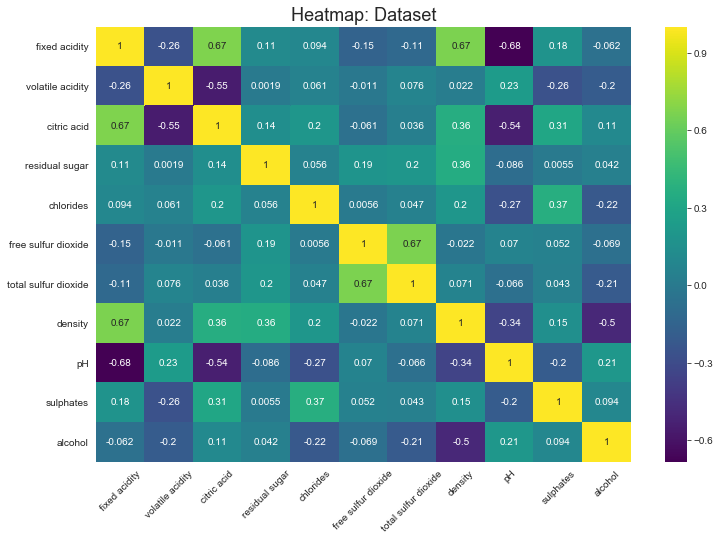

In [85]:
fig, axes = plt.subplots(figsize=(12, 8))

sns.heatmap(data=dataset.corr(), ax=axes, annot=True, cmap='viridis')
axes.set_xticklabels(dataset.columns, rotation=45)
axes.set_title("Heatmap: Dataset", fontdict={'fontsize' : 18});

Correletion of grouped mean based on quality:

In [64]:
group_mean.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.553962,0.795566,0.103282,-0.356670,0.068188,-0.260906,-0.419476,-0.608999,0.733516,0.667928
volatile acidity,-0.553962,1.000000,-0.901973,0.160735,0.945009,-0.572284,-0.335633,0.770868,0.932916,-0.912122,-0.765884
citric acid,0.795566,-0.901973,1.000000,-0.025673,-0.833314,0.294978,0.024944,-0.830018,-0.920308,0.986740,0.913850
residual sugar,0.103282,0.160735,-0.025673,1.000000,0.057806,-0.635989,-0.508754,-0.103023,0.294474,-0.024062,0.140925
chlorides,-0.356670,0.945009,-0.833314,0.057806,1.000000,-0.412967,-0.258357,0.891039,0.849751,-0.879625,-0.808522
free sulfur dioxide,0.068188,-0.572284,0.294978,-0.635989,-0.412967,1.000000,0.908935,-0.005796,-0.607430,0.246233,-0.049001
total sulfur dioxide,-0.260906,-0.335633,0.024944,-0.508754,-0.258357,0.908935,1.000000,0.140621,-0.394849,-0.028238,-0.281133
density,-0.419476,0.770868,-0.830018,-0.103023,0.891039,-0.005796,0.140621,1.000000,0.720483,-0.891547,-0.951095
pH,-0.608999,0.932916,-0.920308,0.294474,0.849751,-0.607430,-0.394849,0.720483,1.000000,-0.890714,-0.737528
sulphates,0.733516,-0.912122,0.986740,-0.024062,-0.879625,0.246233,-0.028238,-0.891547,-0.890714,1.000000,0.950703


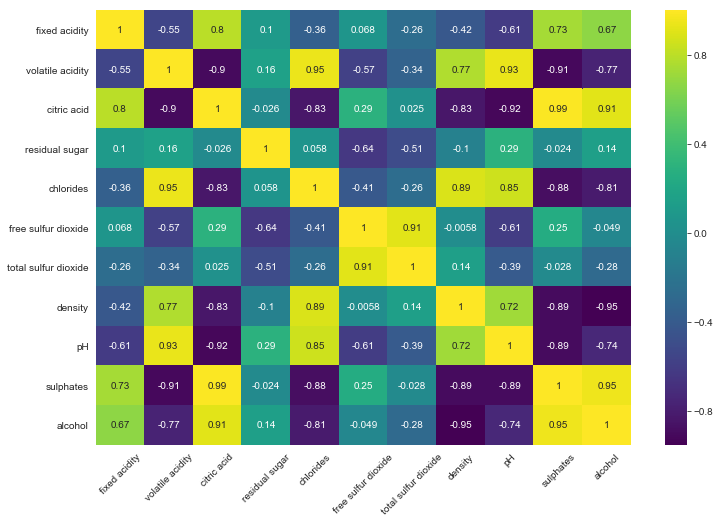

In [83]:
fig, axes = plt.subplots(figsize=(12, 8))

sns.heatmap(data=group_mean.corr(), ax=axes, annot=True, cmap='viridis')
axes.set_xticklabels(dataset.columns, rotation=45, ha='center');

As we can see, the correlation between accidity and level of sulfur dioxide is quite strong. Also in the grouped correlation heat map, there are a lot of strong correlations, but probably it will be to optimistic to use the grouped one.

----

## Summary

- Our dataset is pretty clean, because there is no missing values written as null or nan, or any sentinel values (zero or 999). No outliers beyond our defined lower bound and upper bound. But, probably there are duplicated data points. Will it disturb the performance of predictive modeling later? we will see.
- The distribution of each feature mostly skewed to the right, with long tail on right,  which means that the median is lower than the mean. But for density and pH, the distributions are normally centered.
- By grouping based on quality, we can see deterministic patterns that can influence the evaluation why some red wines are in some specific class. Also we see there are trends for some features.